# LABORATORIO VIRTUAL DE RUIDO

Sistemas de Visión

Carlos Jara y Christopher Morales

## Ejercicio 1 - "Identificación  y Filtrado de Ruido"

In [2]:
#Importar las librerías por utlizar
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import io
from skimage.filters import gaussian, median, sobel, sobel_v, sobel_h
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

#Obtener la direccion de las imagenes
path = os.getcwd()



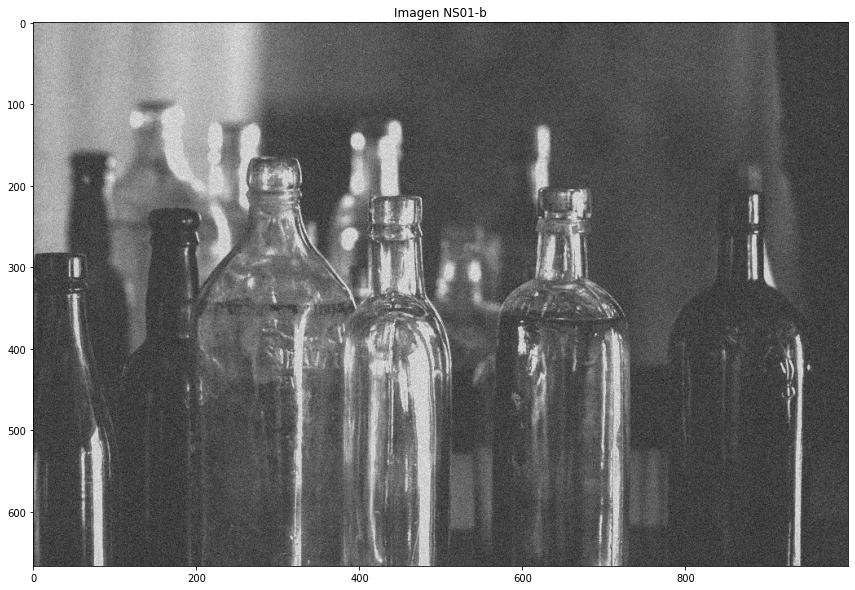

In [3]:
#Mostrar la Imagen original NS01_b
NS01_b= io.imread(path +r'\NS01\NS01-b.png',True)

plt.figure(figsize=(15,10))
plt.imshow(NS01_b,cmap='gray')
plt.title("Imagen NS01-b")
plt.show()

Ruido de tipo gaussiano:
se puede reducir:

1. Filtro gaussiano
2. Filtro bilateral

Este tipo de ruido, cuya naturaleza es gaussiana o normal, se puede neutralizar mediante una máscara que tenga una aproximación discreta de una distribución gaussiana.

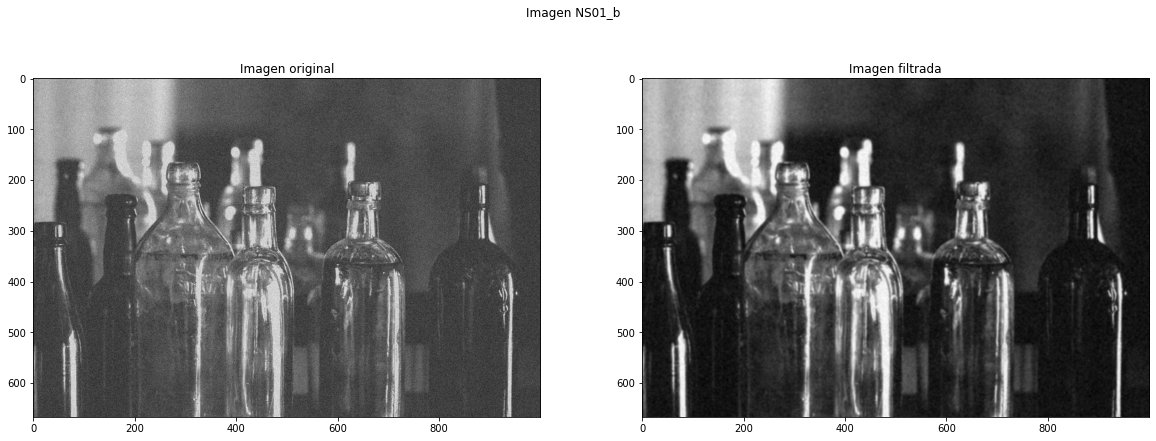

In [4]:
#Filtro Gaussiano
NS01_b_filtrada = gaussian(NS01_b, sigma=1.3)

fig2, axs = plt.subplots(1,2,figsize=(20,7))
fig2.suptitle('Imagen NS01_b')
axs[0].imshow(NS01_b,cmap='gray')
axs[0].set_title('Imagen original')

axs[1].imshow(NS01_b_filtrada,cmap='gray')
axs[1].set_title('Imagen filtrada')

plt.show()

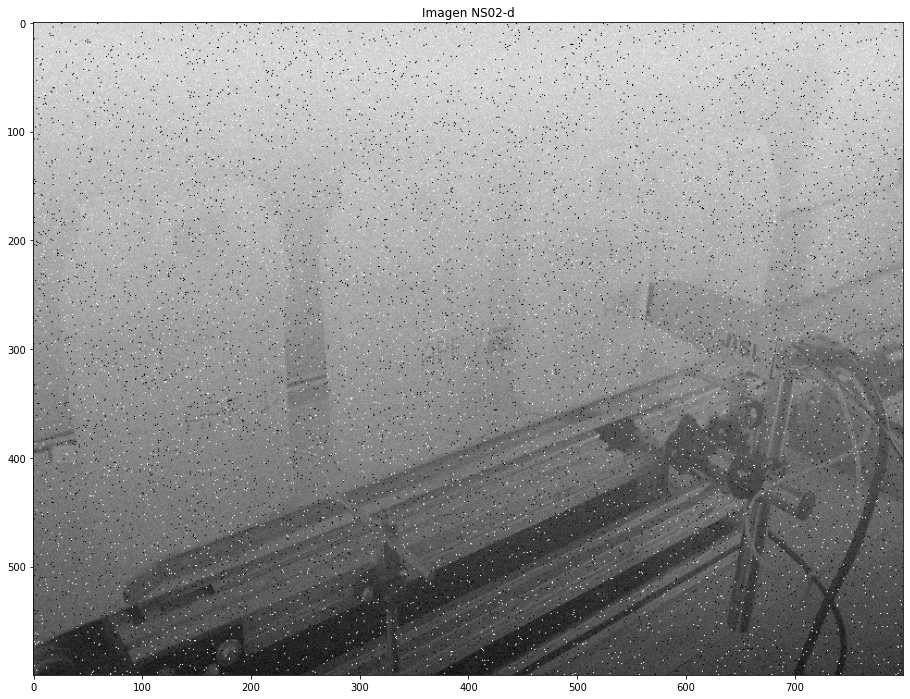

In [5]:
#Mostrar la Imagen original NS02-d
NS02_d= io.imread(path +r'\NS02\NS02-d.png',True)

plt.figure(figsize=(16,12))
plt.imshow(NS02_d,cmap='gray')
plt.title("Imagen NS02-d")
plt.show()

Ruido de tipo sal y pimienta
se puede reducir:

1. Filtro de sustitución aproximado (mediana)
2. Filtro de sustitución máximo-mínimo
3. Filtro de sustitución bicho raro

En este caso se utilizará un filtro de mediana para reducir el ruido sal y pimienta de forma que los valores atípicos o extremos de gradiente se eliminan al desplazar el kernel de convolución

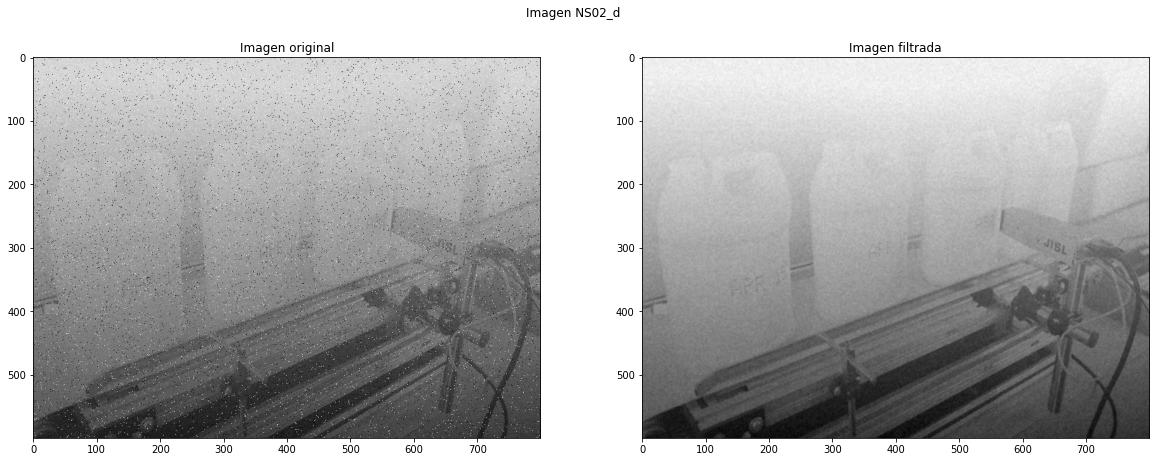

In [6]:
#Filtro de mediana
NS02_d_filtrada = median(NS02_d)

fig3, axs = plt.subplots(1,2,figsize=(20,7))
fig3.suptitle('Imagen NS02_d')
axs[0].imshow(NS02_d,cmap='gray')
axs[0].set_title('Imagen original')

axs[1].imshow(NS02_d_filtrada,cmap='gray')
axs[1].set_title('Imagen filtrada')

plt.show()

## Ejercicio 2 - Programación de una Máscara "desde cero"

Las máscaras de convolución de un filtro de Sobel, se dividen en 2: horizontal y vertical. Estos kernels buscan realizar una aproximación a la derivada de la señal en estas dos direcciones. De forma que, el horizontal detecta cambios grandes de gradiente la desplazarse en el eje horizontal, de forma que se detectan las altas frecuencias horizontales. En otras palabras es un filtro pasas altas de frecuencias horizontales. Para entender mejor este concepto se analiza una porción de una imagen con la máscara horizontal: 

Si la porción de imagen de arriba a abajo es uniforme (baja frecuencia horizontal) al desplazar el kernel, la fila superior [1 2 1] se cancela con la fila inferior [-1 -2 -1], por lo que el valor obtenido es bajo (o nulo); sin embargo, si existe un borde horizontal (alta frecuencia horizontal) la fila inferior [1 -2 -1] tendrá valores mayores que la fila [1 2 1] por lo tanto en ese punto aumenta el gradiente resultante y se detecta el borde horizontal

De forma análoga, ocurre lo mismo con el kernel vertical para bordes verticales

Si se desea realizar una detección de bordes de 45° y 135° se debe realizar un análisis similar pero cambiando o "rotando" el kernel.

In [7]:
#máscara de sobel para 45° y 135°
mask_45 = [
    [2,  1,  0],
    [1,  0, -1], 
    [0, -1, -2]]

mask_135 = [
    [ 0,  1,  2],
    [-1,  0,  1], 
    [-2, -1,  0]]


Las mascaras anteriores fueron basadas en el articulo publiado por Saeid Taslimi, Rasoul Faraji, Ali Aghasi y Hamid Reza Naji.

Para la deteccion de bordes utilizando las mascaras definidas anteriormente se creo una rutina de convolucion manual, es decir hace un barrido tal y como se vio en la clase.

In [8]:
#Generación de las imagenes con deteccion de bordes 
NS03_b= io.imread(path +r'\NS03\NS03-b.png',True)

def convo_manual(image, mask):
    filtered = []
    temp = 0
    runs_h = len(image[1])-len(mask)+1
    runs_v = len (image)-len(mask)+1
    for rv in range(runs_v):
        filtered.append([])
        for rh in range(runs_h):
            for row in range(len(mask)):
                for column in range(len(mask)): #recorre por columna la fila row
                    temp = image[rv+row][rh+column]*mask[row][column] + temp
            filtered[rv].append(temp)
            temp = 0
    return filtered

#Ejecucion de las mascaras
NS03_b_h = sobel_h(NS03_b)
NS03_b_v = sobel_v(NS03_b)
NS03_b_45 = convo_manual(NS03_b,mask_45)
NS03_b_135 = convo_manual(NS03_b,mask_135)


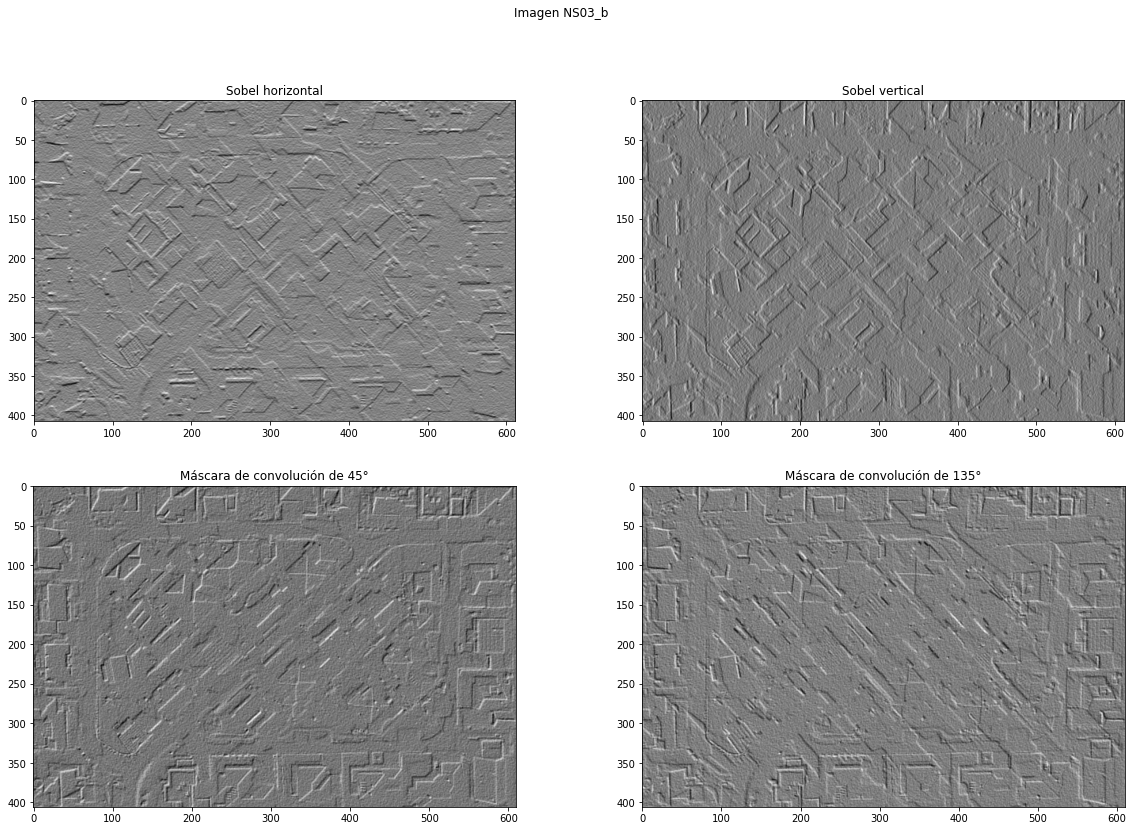

In [9]:
#Mostrar las imagenes resultantes
fig4, axs = plt.subplots(2,2,figsize=(20,13))
fig4.suptitle('Imagen NS03_b')

axs[0,0].imshow(NS03_b_h,cmap='gray')
axs[0,0].set_title('Sobel horizontal')

axs[0,1].imshow(NS03_b_v,cmap='gray')
axs[0,1].set_title('Sobel vertical')

axs[1,0].imshow(NS03_b_45,cmap='gray')
axs[1,0].set_title('Máscara de convolución de 45°')

axs[1,1].imshow(NS03_b_135,cmap='gray')
axs[1,1].set_title('Máscara de convolución de 135°')

plt.show()

La comparacion entre los resultados producto de los diferentes filtros se aprecia en la imagen anterior. Se observa que en su mayoria se atenuan los bordes que no son paralelos al angulo para el cual fue diseñado el filtro. En el caso de los bordes a angulos perpendiculares al angulo para el cual fue diseñado el filtro no se capturan del todo.
Asimismo, cabe destacar que la resolucion de la imagen se reduce puesto que por la naturaleza de la convolucion se disminuye el tamaño de la imagen.

## Ejercicio 3 - Transformada Rápida de Fourier en Imágenes

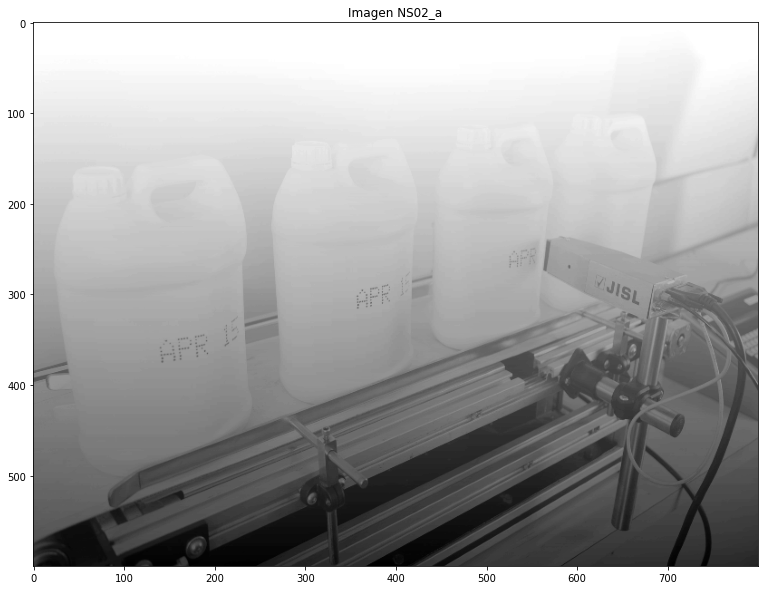

In [20]:
#Mostrar la Imagen original NS02-a
NS02_a= io.imread(path +r'\NS02\NS02-a.png',True)

plt.figure(figsize=(15,10))
plt.imshow(NS02_a,cmap='gray')
plt.title("Imagen NS02_a")
plt.show()

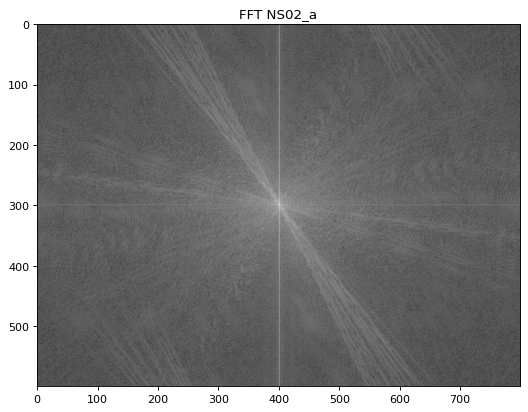

In [19]:
NS02_a_fourier = np.fft.fftshift(np.fft.fft2(NS02_a))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(NS02_a_fourier)), cmap='gray')
plt.title("FFT NS02_a")
plt.show()


In [15]:
def fourier_masker_ver(image, i,width=2):
    f_size = 15
    h,v = image.shape
    NS02_a_fourier = np.fft.fftshift(np.fft.fft2(image))
    NS02_a_fourier[:, v//2-width//2:v//2+width//2] = i
    fig, ax = plt.subplots(1,3,figsize=(20,20))
    ax[0].imshow(np.log(abs(NS02_a_fourier)), cmap='gray')
    ax[0].set_title('FFT filtrando frecuencias verticales', fontsize = f_size)
    ax[1].imshow(image, cmap = 'gray')
    ax[1].set_title('Imagen original en escala de grises', fontsize = f_size)
    ax[2].imshow(abs(np.fft.ifft2(NS02_a_fourier)), cmap='gray')
    ax[2].set_title('Imagen con frecuencias verticales filtradas', fontsize = f_size)

def fourier_masker_hor(image, i,width=2):
    f_size = 15
    h,v = image.shape
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(image))
    dark_image_grey_fourier[h//2-width//2:h//2+width//2, :] = i
    fig, ax = plt.subplots(1,3,figsize=(20,20))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('FFT filtrando frecuencias horizontales', fontsize = f_size)
    ax[1].imshow(image, cmap = 'gray')
    ax[1].set_title('Imagen original en escala de grises', fontsize = f_size)
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), cmap='gray')
    ax[2].set_title('Imagen con frecuencias horizontales filtradas', fontsize = f_size)

def fourier_masker_high_pass(image, i,Rad=2):
    f_size = 15
    h,v = image.shape
    fourier = np.fft.fftshift(np.fft.fft2(image))
    for a in range(h):
        for b in range(v):
            if (np.sqrt((h/2-a)**2+(v/2-b)**2) < Rad):
                fourier[a][b] = i    
    fig, ax = plt.subplots(1,3,figsize=(20,20))
    ax[0].imshow(np.log(abs(fourier)), cmap='gray')
    ax[0].set_title('FFT filtrando frecuencias bajas', fontsize = f_size)
    ax[1].imshow(image, cmap = 'gray')
    ax[1].set_title('Imagen original en escala de grises', fontsize = f_size)
    ax[2].imshow(abs(np.fft.ifft2(fourier)), cmap='gray')
    ax[2].set_title('Imagen con frecuencias bajas filtradas', fontsize = f_size)

def fourier_masker_low_pass(image, i,Rad=2):
    f_size = 15
    h,v = image.shape
    fourier = np.fft.fftshift(np.fft.fft2(image))
    for a in range(h):
        for b in range(v):
            if (np.sqrt((h/2-a)**2+(v/2-b)**2) > Rad):
                fourier[a][b] = i        
    fig, ax = plt.subplots(1,3,figsize=(20,20))
    ax[0].imshow(np.log(abs(fourier)), cmap='gray')
    ax[0].set_title('FFT filtrando frecuencias altas', fontsize = f_size)
    ax[1].imshow(image, cmap = 'gray')
    ax[1].set_title('Imagen original en escala de grises', fontsize = f_size)
    ax[2].imshow(abs(np.fft.ifft2(fourier)), cmap='gray')
    ax[2].set_title('Imagen con frecuencias altas filtradas', fontsize = f_size)    

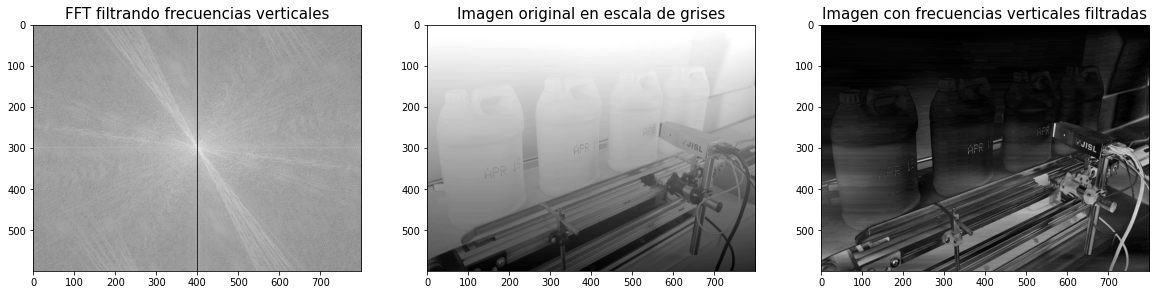

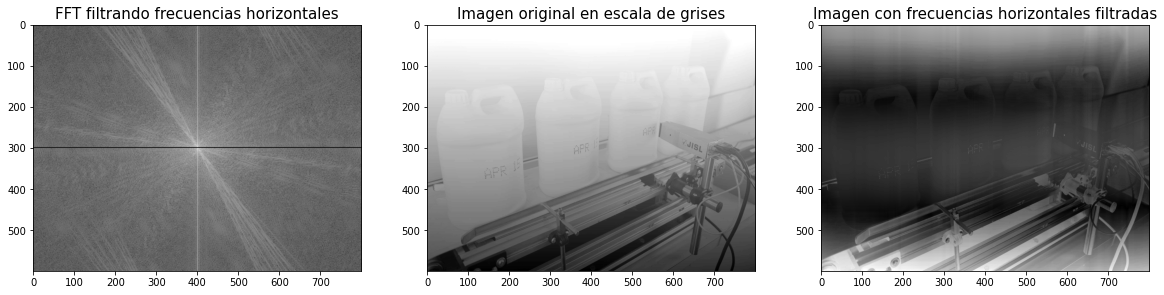

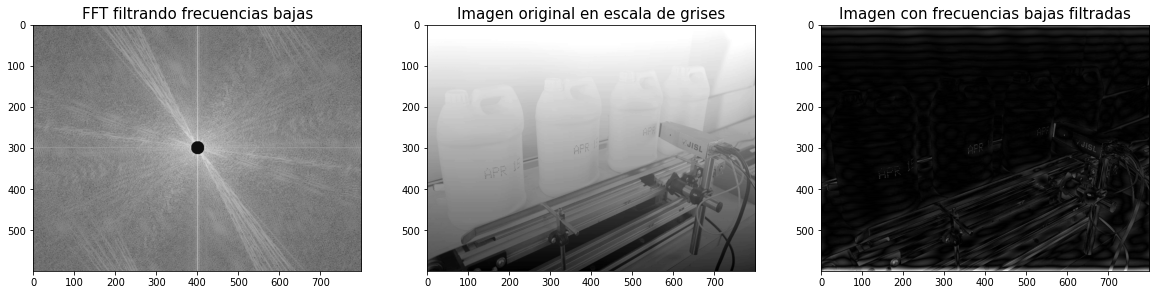

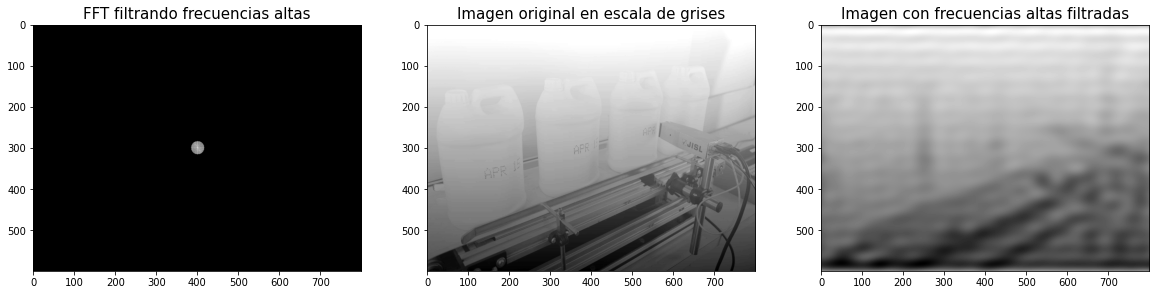

In [16]:
fourier_masker_ver(NS02_a, 0.001,2)
fourier_masker_hor(NS02_a, 1,2)
fourier_masker_high_pass(NS02_a, 1,16)
fourier_masker_low_pass(NS02_a, 1,16)

En las imagenes anteriores se muestran los resultados del filtrado de la misma imagen utilizando diversas mascaras. Primero se muestra la mascara utilizada, luego la imagen original y finalmente el resultado del filtrado.

Se observa lo siguiente:
<ul>
<li>Filtrado de frecuencias verticales: En si este filtrado lo que hace es, filtrar los gradientes con frecuencias horizontales cercanas o iguales a 0. Por lo tanto se observa como el fondo de la imagen, que en su mayoria es de un mismo gradiente horizontalmente, es decir de frecuencia nula, se ve filtrado.</li>
<li>Filtrado de frecuencias horizontales: En si este filtrado lo que hace es, filtrar los gradientes con frecuencias verticales cercanas o iguales a 0. Por lo tanto se observan en la imagen algunas franjas horizontales filtradas, y otras que se conservan a diferencia del filtrado vertical, esto es debido a que estas franjas conservadas poseen frecuencia vertical no nula, o lo suficientemente alta para no ser filtradas.</li>
<li>Filtrado de frecuencias bajas: En este tipo de filtrado se eliminan todas las frecuencias bajas, menores a una frecuencia de corte, sin importar el eje u orientacion. Si lo pensamos, los elementos de la imagen que poseen freceuncias bajas son principalmente los bordes, y esto se aprecia en la imagen filtrada, donde se conservan los bordes, filtrando asi el ruido y el "relleno".</li>
<li>Filtrado de frecuencias altas: En este tipo de filtrado se eliminan todas las frecuencias altas, mayores a una frecuencia de corte, sin importar el eje u orientacion. Ahora bien, contrario al filtrado anterior, se conservan los gradientes de altas frecuencias, que se aprecian en el "relleno" de los diferentes elementos en la imagen, en este caso el relleno de los contenedores y maquinaria. Asimismo, se conserva el ruido y se filtran los bordes. </li>
</ul>